In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [4]:
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [5]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [6]:
y = df['mean_exam_points'].values
y

array([63., 86., 53., ..., 58., 51., 59.])

In [7]:
X = df.loc[:, df.columns != 'mean_exam_points']
X = X.values[:,1:]
X

array([[4.00e+01, 0.00e+00, 1.40e+03, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [4.80e+01, 4.00e+00, 2.85e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.90e+01, 0.00e+00, 1.20e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [3.40e+01, 1.00e+00, 1.25e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.30e+01, 3.00e+00, 1.10e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.50e+01, 0.00e+00, 1.45e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
class Node:

    def __init__(self, index, t, true_branch, false_branch, level):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле
        self.level = level # уровень узла

# И класс терминального узла (листа)
class Leaf:

    def __init__(self, data, labels):
        self.data = data
        self.labels = labels  # y_true
        self.prediction = self.predict()  # y_pred

    def predict(self):
        return self.labels.mean()


# Разбиение датасета в узле

def split(data, labels, index, t):
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)

    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
    return true_data, false_data, true_labels, false_labels

def rss(labels):
    return np.sum((labels - labels.mean())**2)

# Расчет качества
def quality(left_labels, right_labels):
    return rss(left_labels) + rss(right_labels)


# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    best_rss = rss(labels)
    best_t = None
    best_index = None

    n_features = data.shape[1]

    for index in range(n_features):
        t_values = [row[index] for row in data]
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            ##  пропускаем разбиения, в которых в узле остается менее 5 объектов
            # if len(true_data) < min_leaf or len(false_data) < min_leaf:
            #    continue

            current_rss = quality(true_labels, false_labels)

            #  выбираем порог, на котором получается максимальный прирост качества
            if current_rss < best_rss:
                best_rss, best_t, best_index = current_rss, t, index

    return best_rss, best_t, best_index

# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels, level = 0, depth = 0):

    RSS, t, index = find_best_split(data, labels)
    #  Базовый случай - прекращаем рекурсию, когда ошибка равна 0
    if rss(labels) == 0:
        return Leaf(data, labels)
    
    # Прекращаем рекурсию когда достигли заданной глубины дерева
    if depth != 0 and level == depth:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    level += 1
    true_branch = build_tree(true_data, true_labels, level, depth)
    false_branch = build_tree(false_data, false_labels, level, depth)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch, level)

In [10]:
# Проход объекта по дереву для его классификации
def pred_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return pred_object(obj, node.true_branch)
    else:
        return pred_object(obj, node.false_branch)

# Предсказание деревом для всего датасета
def predict(data, tree):
    
    y_pred = []
    for obj in data:
        prediction = pred_object(obj, tree)
        y_pred.append(prediction)
    return y_pred

In [11]:
def r2_score(y_true, y_pred):
    return 1 - np.sum((y_true-y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

In [12]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * predict([x],alg)[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [13]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [14]:
def bias(y, z):
    return (y - z)

In [15]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        #tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            #tree.fit(X_train, y_train)
            tree = build_tree(X_train, y_train,depth=max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            #tree.fit(X_train, bias(y_train, target))
            tree = build_tree(X_train, bias(y_train, target),depth=max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [16]:
# Число деревьев в ансамбле
n_trees = 15

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

C:\Users\sych_\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice.
C:\Users\sych_\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {r2_score(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {r2_score(y_test, test_prediction)}')

In [18]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 15 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 0.7504117542548326
Ошибка алгоритма из 15 деревьев глубиной 2     с шагом 1 на тестовой выборке: 0.7447251325811086


In [19]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

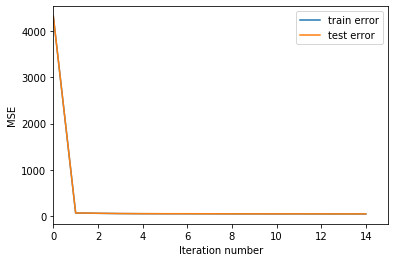

In [20]:
get_error_plot(n_trees, train_errors, test_errors)

In [21]:
df_kaggle = pd.read_csv('test.csv',',')
df_kaggle.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X_kaggle = df_kaggle.values[:,1:]
X_kaggle

array([[4.60e+01, 3.00e+00, 1.05e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.30e+01, 3.00e+00, 1.85e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.20e+01, 1.00e+00, 1.55e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [3.30e+01, 5.00e+00, 1.10e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.80e+01, 0.00e+00, 1.75e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.90e+01, 5.00e+00, 2.00e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [23]:
kaggle_prediction = gb_predict(X_kaggle, trees, coefs, eta)

In [24]:
kaggle_prediction

array([54.36617655, 64.26724314, 51.07074864, ..., 56.27008737,
       64.30546982, 75.25588818])

In [25]:
df_kaggle['mean_exam_points'] = kaggle_prediction

In [26]:
df_kaggle.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,54.366177
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,64.267243
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,51.070749
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,90.059808
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,89.994519


In [27]:
df_kaggle.drop("age", axis=1, inplace=True)
df_kaggle.drop("years_of_experience", axis=1, inplace=True)
df_kaggle.drop("lesson_price", axis=1, inplace=True)
df_kaggle.drop("qualification", axis=1, inplace=True)
df_kaggle.drop("physics", axis=1, inplace=True)
df_kaggle.drop("chemistry", axis=1, inplace=True)
df_kaggle.drop("biology", axis=1, inplace=True)
df_kaggle.drop("english", axis=1, inplace=True)
df_kaggle.drop("geography", axis=1, inplace=True)
df_kaggle.drop("history", axis=1, inplace=True)
df_kaggle.head()

,Id,mean_exam_points
0,10000,54.366177
1,10001,64.267243
2,10002,51.070749
3,10003,90.059808
4,10004,89.994519


In [28]:
df_kaggle.to_csv('sych_gulnara.csv',index=False)